In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''
cardataset
car_sale_advertisements
Vehicle_dataset_from_cardekho
CarPrice_Assignment
'''

'\ncardataset\ncar_sale_advertisements\nVehicle_dataset_from_cardekho\nCarPrice_Assignment\n'

In [13]:
# df_0 will be the one currently in the Regression notebook # price highway-mpg city-mpg horsepower
df_1 = pd.read_csv("datasets/cardataset.csv") # year highway-mpg city-mpg price horsepower !
df_1.rename(columns={"Year":"year","highway MPG":"highway-mpg","city mpg":"city-mpg","MSRP":"price","Engine HP":"horsepower"}, inplace=True)
df_2 = pd.read_csv("datasets/car_sale_advertisements.csv") # mileage(kilo->mile) price year car(make)
df_2.rename(columns={"car":"make"}, inplace=True)
df_3 = pd.read_csv("datasets/Vehicle_dataset_from_cardekho.csv") # Selling_Price Present_Price Kms_Driven(turn into mileage) Year
df_4 = pd.read_csv("datasets/CarPrice_Assignment.csv") # price horsepower city-mpg highway-mpg
df_4.rename(columns={"citympg":"city-mpg","highwaympg":"highway-mpg"}, inplace=True)

## *Can I combine datasets for better performance?* 

#### I think I'll make models of them alone, then combined to see the difference.
---
### Groups
1. (mpg & hp) df 0, 1, 4
2. (miles & yr) df 2, 3

In [14]:
# with open('datasets/car_sale_advertisements.csv', 'r') as file:
#     data = file.read() # .replace('\n', '')
# data = data.replace('\t',',')
# data = data[1:]
# # print(data)
# f = open("datasets/car_sale_advertisements.csv", "w")
# f.write(data)
# f.close()

In [25]:
# df_1.info()
# gapminder.rename(columns={'pop':'population'}, inplace=True)
# df_1.rename(columns={"Year":"year","highway MPG":"highway-mpg","city mpg":"city-mpg","MSRP":"price","Engine HP":"horsepower"}, inplace=True)
# df_2 = pd.read_csv("del_me.csv")
df_4.columns
# df_3['Car_Name'].unique

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

# Getting insight into the data!

In [19]:
corr_matrix = df_3.corr() # Selling_Price Present_Price Kms_Driven(turn into mileage) Year
corr_matrix
# looking at how the other numberic features relate to median_house_value
corr_matrix['Present_Price'].sort_values(ascending=False)

Present_Price    1.000000
Selling_Price    0.878983
Kms_Driven       0.203647
Owner            0.008057
Year            -0.047584
Name: Present_Price, dtype: float64

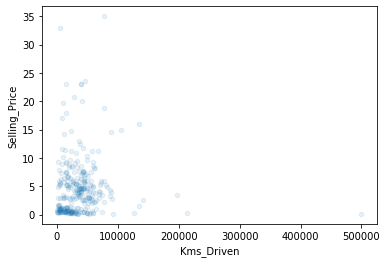

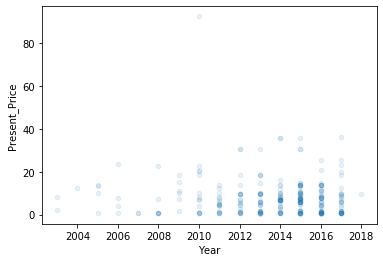

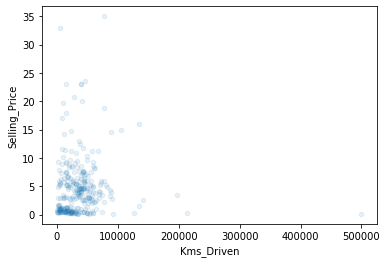

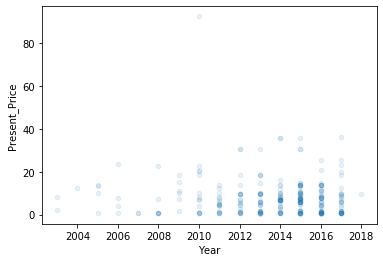

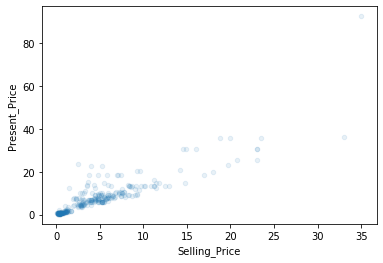

In [20]:
df_3.plot(kind="scatter", x='Kms_Driven', y='Selling_Price', alpha=0.1) # Selling_Price Present_Price Kms_Driven(turn into mileage) Year
df_3.plot(kind="scatter", x='Year', y='Present_Price', alpha=0.1)
df_3.plot(kind="scatter", x='Kms_Driven', y='Selling_Price', alpha=0.1)
df_3.plot(kind="scatter", x='Year', y='Present_Price', alpha=0.1)
df_3.plot(kind="scatter", x='Selling_Price', y='Present_Price', alpha=0.1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1232e31d0>,
      dtype=object)

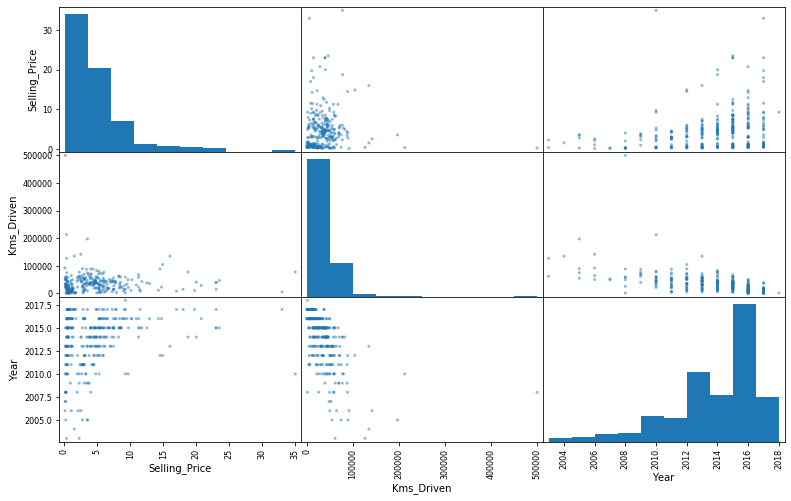

In [21]:
from pandas.plotting import scatter_matrix
attr = ['Selling_Price','Kms_Driven', 'Year' ]  # Selling_Price Present_Price Kms_Driven(turn into mileage) Year
scatter_matrix(df_3[attr], figsize=(13,8))

# Cleaning the data!

In [ ]:
# for col in df:
#     df[col] = df[col].map({'?':np.NaN})
df = df.replace('?', '')

## Cleaning the numeric data!

In [ ]:
from sklearn.impute import SimpleImputer
# making the imputer and telling it to replace missing values with the median
imputer = SimpleImputer(strategy='median')
# selecting the numeric columns so we don't break the imputer
df_num = df.select_dtypes(include=[np.number])
# median is in statistics_ variable
imputer.fit(df_num)
x = imputer.transform(df_num)
# creating a dataframe without any missing numeric types
df_num = pd.DataFrame(x, columns = df_num.columns, index=df_num.index)

In [ ]:
df.describe()

In [ ]:
df_num.describe()

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
# making and imputer and telling it to replace missing values with the median
housing_num = housing.select_dtypes(include=[np.number])
# text attribute break imputers, so we have to take it out
# here we are selecting the numberic types
imputer.fit(housing_num)
# median is also saved in the imputer's statistics_ variable
print(imputer.statistics_ == housing_num.median().values)
X = imputer.transform(housing_num)
# here is where the magic happens and the missing numberic values are replaced with the median
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index=housing_num.index)
# making a dataframe without any missing values